### Input Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


### Import Data

In [10]:
df = pd.read_csv('https://raw.github.com/JYHYL/EART60702-Group3/add-final-dataset/full_dataset.csv')

### Data Exploration

In [11]:
df.head()

,date,year,month,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon,model
0,2006-01-01,2006,1,9.625855,41.925180,25.926952,4.663135e-09,4.781004e-17,0.004769,279.14288,3.878579,1.394184,53.246075,357.5,3
1,2006-01-02,2006,1,11.321136,8.905806,10.946910,8.046593e-08,1.295726e-16,0.006271,281.14865,1.788157,3.821703,53.246075,357.5,3
2,2006-01-03,2006,1,11.137970,16.511415,6.405902,2.910936e-09,4.094447e-16,0.005782,281.22380,0.804845,-2.299140,53.246075,357.5,3
3,2006-01-04,2006,1,8.971100,29.948362,9.315041,7.432505e-11,0.000000e+00,0.004277,278.39767,-1.100267,-1.258029,53.246075,357.5,3
4,2006-01-05,2006,1,7.740906,19.064156,7.941241,6.894238e-12,0.000000e+00,0.003990,278.06378,-0.706321,-0.938421,53.246075,357.5,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165143 entries, 0 to 165142
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        165143 non-null  object 
 1   year        165143 non-null  int64  
 2   month       165143 non-null  int64  
 3   TREFMXAV_U  165143 non-null  float64
 4   FLNS        164244 non-null  float64
 5   FSNS        165143 non-null  float64
 6   PRECT       165143 non-null  float64
 7   PRSN        164244 non-null  float64
 8   QBOT        164244 non-null  float64
 9   TREFHT      164244 non-null  float64
 10  UBOT        164244 non-null  float64
 11  VBOT        164244 non-null  float64
 12  lat         165143 non-null  float64
 13  lon         165143 non-null  float64
 14  model       165143 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 18.9+ MB


In [15]:
df.describe()

,year,month,TREFMXAV_U,FLNS,FSNS,PRECT,PRSN,QBOT,TREFHT,UBOT,VBOT,lat,lon,model
count,165143.000000,165143.000000,165143.000000,164244.000000,165143.000000,1.651430e+05,1.642440e+05,164244.000000,164244.000000,164244.000000,164244.000000,165143.000000,165143.000000,165143.000000
mean,2042.998432,6.525654,15.744393,43.101483,97.295389,3.358928e-08,3.165129e-10,0.006545,284.932506,1.208071,1.516496,53.246086,355.540232,5.932779
std,21.647895,3.447774,5.235228,21.538857,75.151348,5.045284e-08,5.173666e-09,0.002123,4.986066,3.061558,2.922219,0.000155,26.489319,6.092593
min,2006.000000,1.000000,-1.822937,-1.557408,1.445412,-7.828160e-25,-9.246341e-21,0.001555,266.015380,-9.797097,-11.123035,53.246075,-2.502111,3.000000
25%,2024.000000,4.000000,11.659805,26.179801,31.266350,1.979676e-09,0.000000e+00,0.004879,281.075025,-1.041753,-0.701179,53.246075,357.500000,4.000000
50%,2043.000000,7.000000,15.240723,40.784411,78.376495,1.266884e-08,6.143178e-22,0.006246,284.656400,1.518637,1.617521,53.246075,357.500000,6.000000
75%,2062.000000,10.000000,19.824814,57.289759,150.102430,4.563117e-08,2.414438e-16,0.007988,288.995475,3.401309,3.621754,53.246075,357.500000,7.000000
max,2080.000000,12.000000,38.107270,118.209470,310.974900,8.357912e-07,4.985002e-07,0.018279,303.117980,12.690058,12.794631,53.248180,357.500000,85.000000


In [17]:
df.isnull().sum()

date            0
year            0
month           0
TREFMXAV_U      0
FLNS          899
FSNS            0
PRECT           0
PRSN          899
QBOT          899
TREFHT        899
UBOT          899
VBOT          899
lat             0
lon             0
model           0
dtype: int64

All the missing values are from the additional dataset. The additional dataset only have two variables, so the other variables will show NULL. But they will not affect the modelling, so we don't handle them.

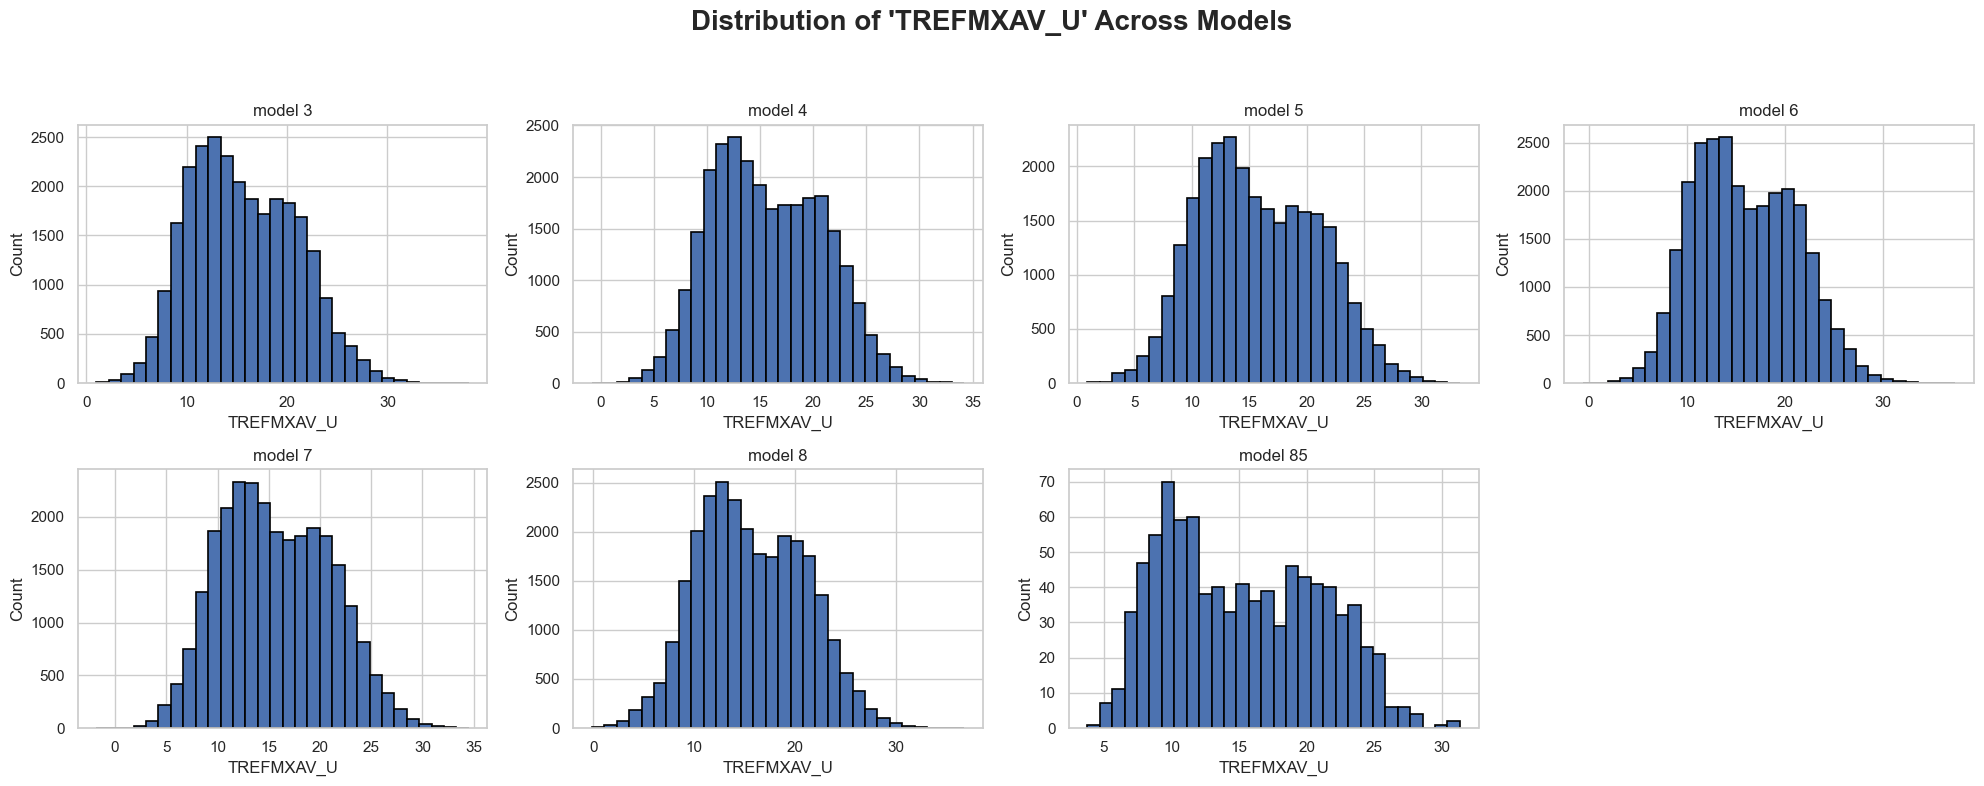

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# 选择要画的模型（你可以是数字或字符串，看你的 Model 列具体类型）
models_to_plot = [3, 4, 5, 6, 7, 8, 85]  # 如果是字符串，就写成 ['3', '4', ...]
target_variable = 'TREFMXAV_U'

# 自动布局
n_models = len(models_to_plot)
n_cols = 4
n_rows = math.ceil(n_models / n_cols)

# 创建 subplot 图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
fig.suptitle(f"Distribution of '{target_variable}' Across Models", fontsize=20, fontweight='bold')
axes = axes.flatten()

for i, model in enumerate(models_to_plot):
    sub_df = df[df['model'] == model]
    data = sub_df[target_variable].dropna()
    
    # 如果该模型没数据就跳过
    if data.empty:
        axes[i].set_title(f'model {model} - No Data')
        axes[i].axis('off')
        continue

    axes[i].hist(data, bins=30, range=(data.min(), data.max()), edgecolor='black', linewidth=1.2)
    axes[i].set_title(f'model {model}')
    axes[i].set_xlabel(target_variable)
    axes[i].set_ylabel('Count')

# 如果 subplot 数量比模型多，清掉多余的
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


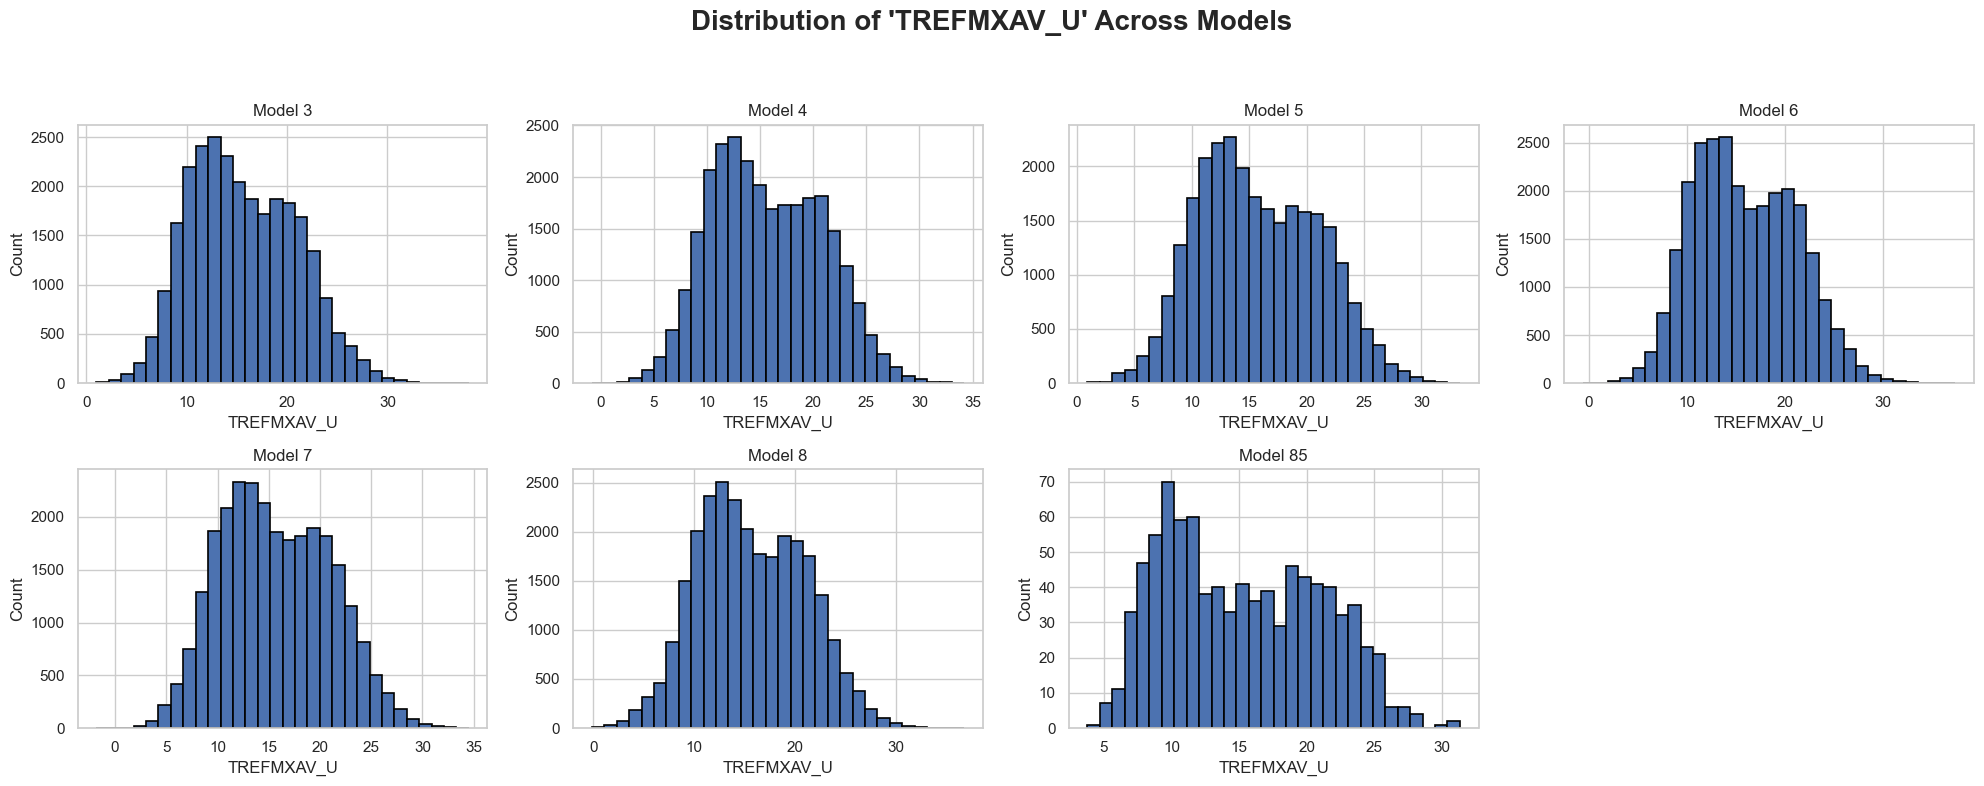

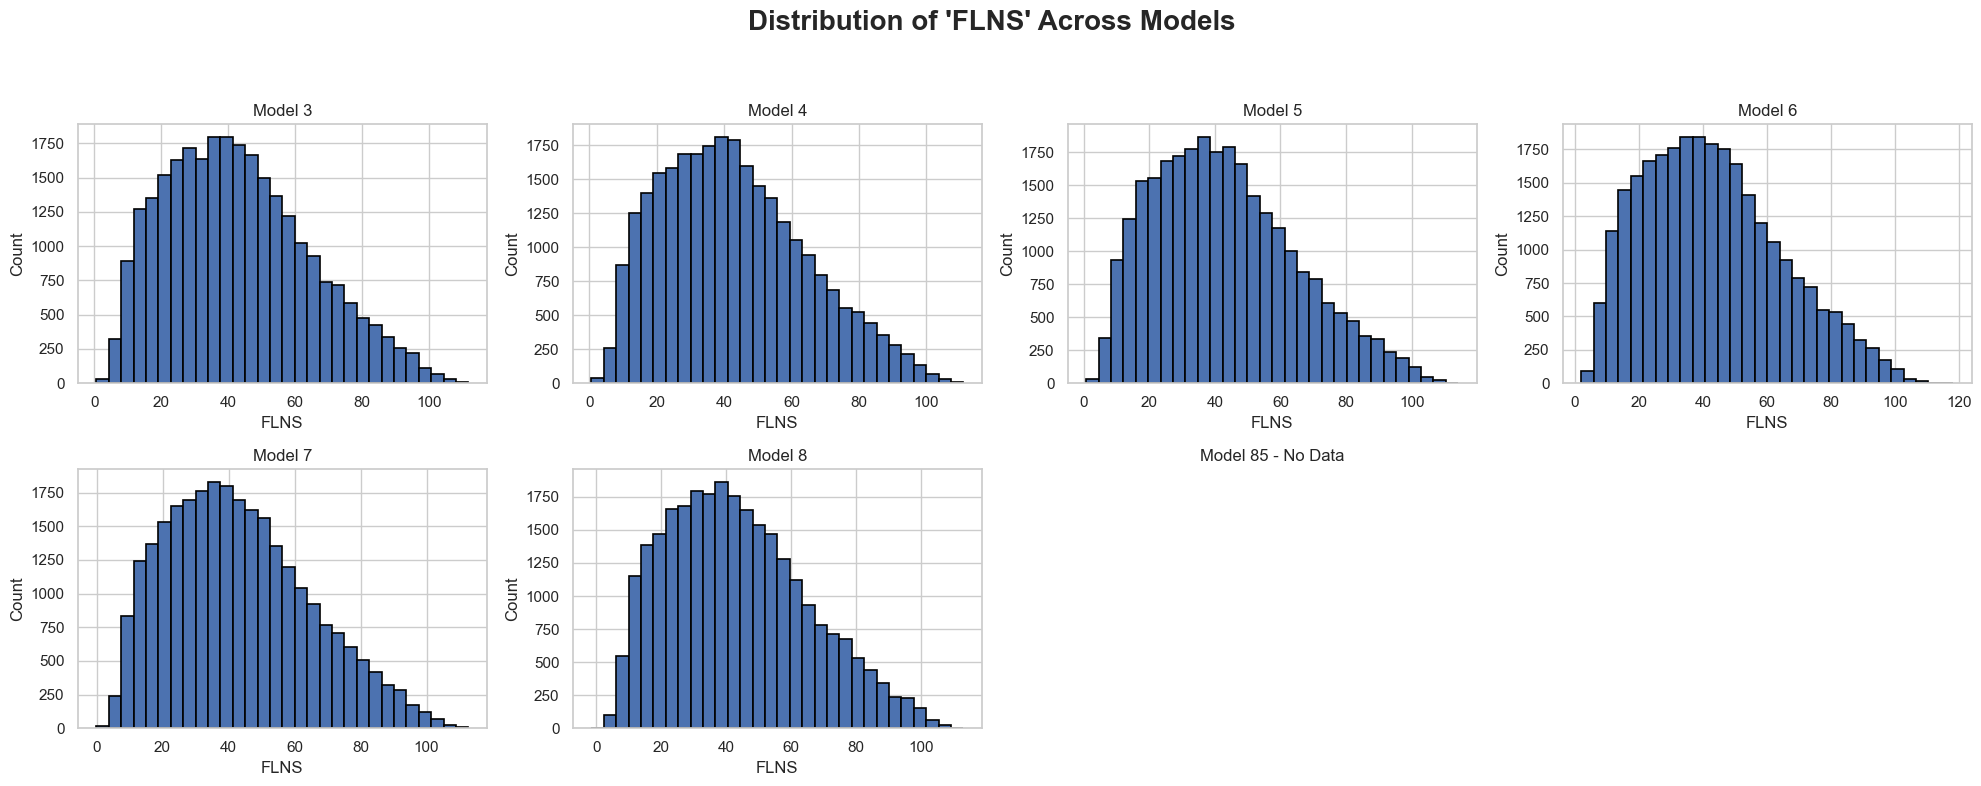

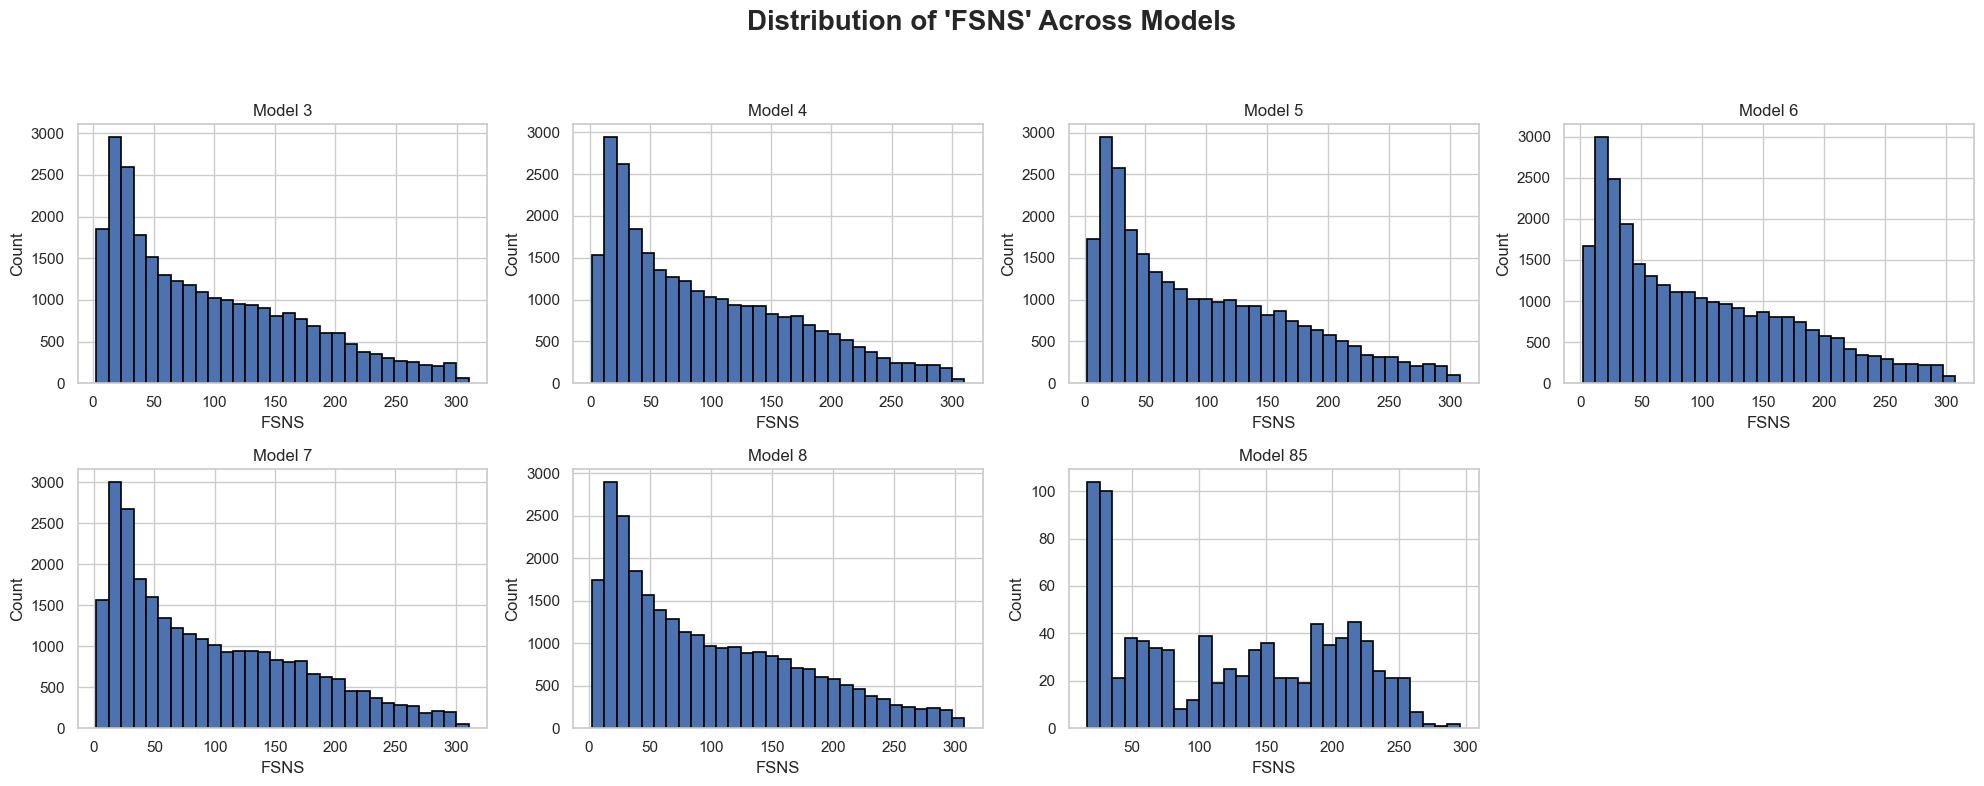

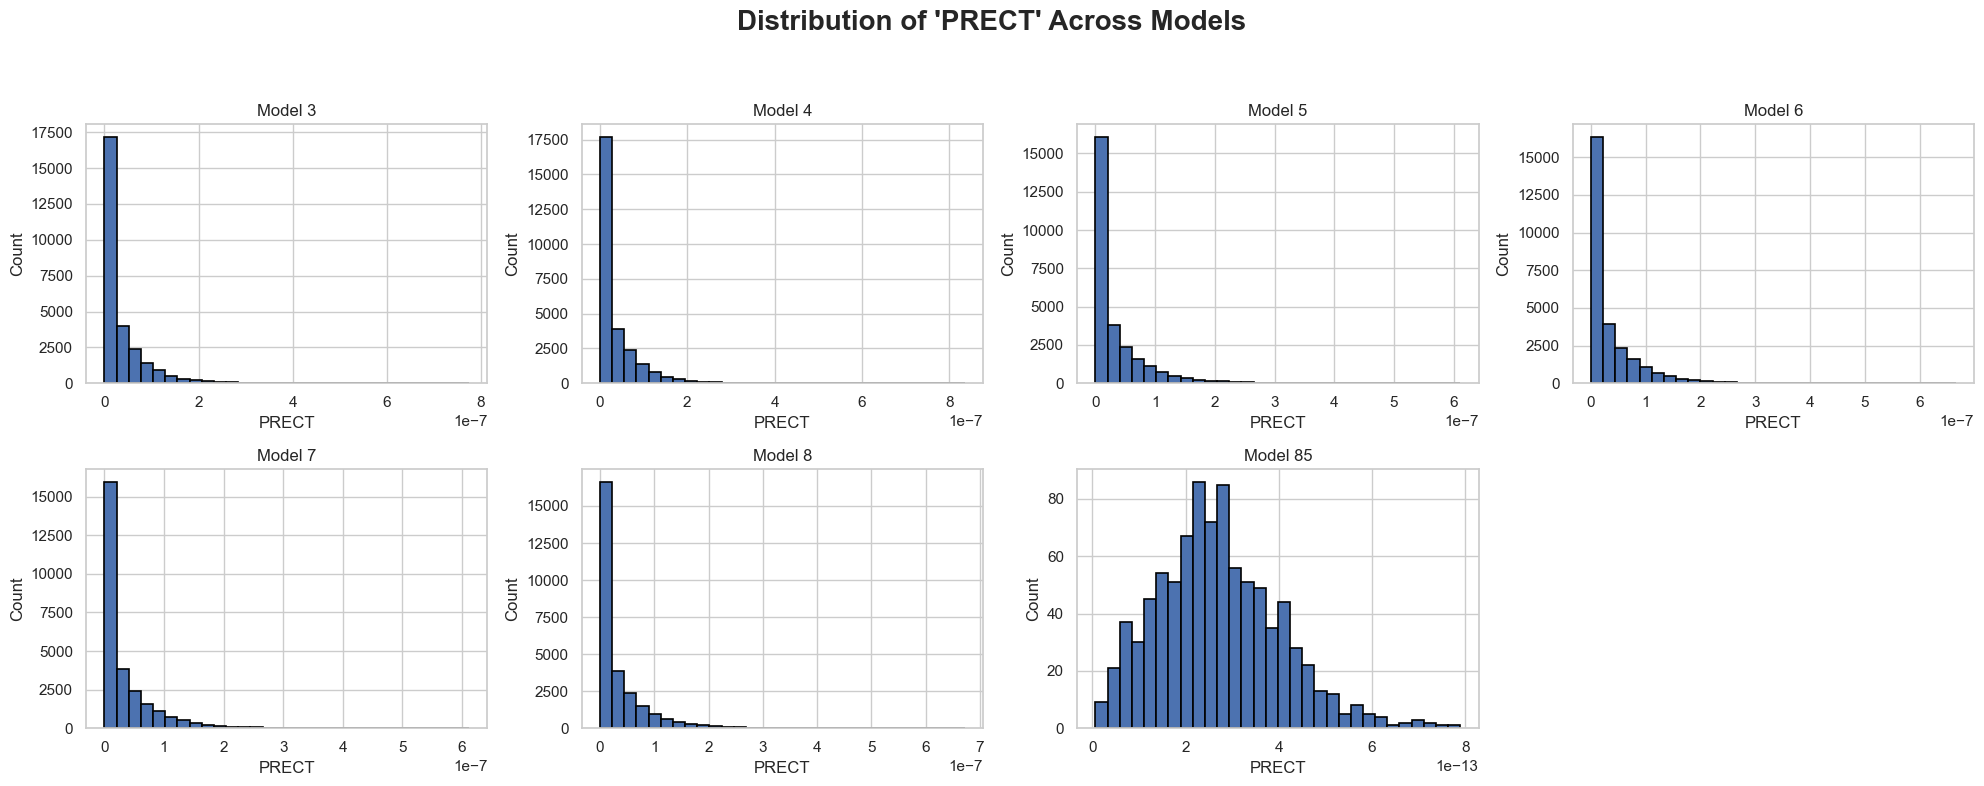

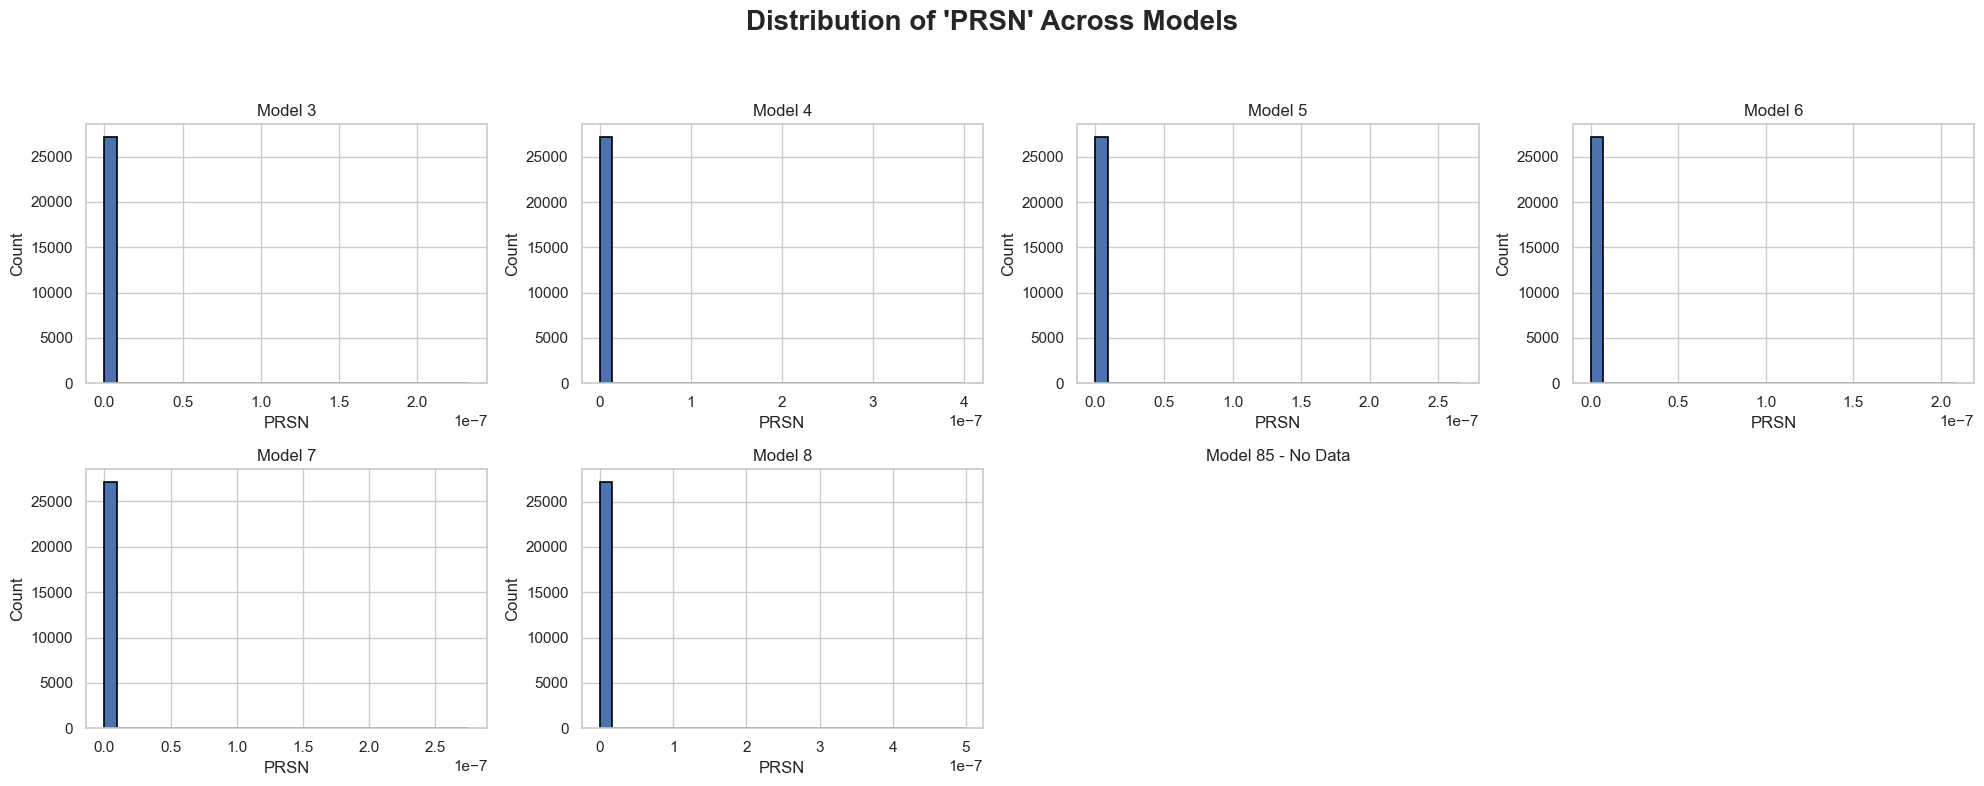

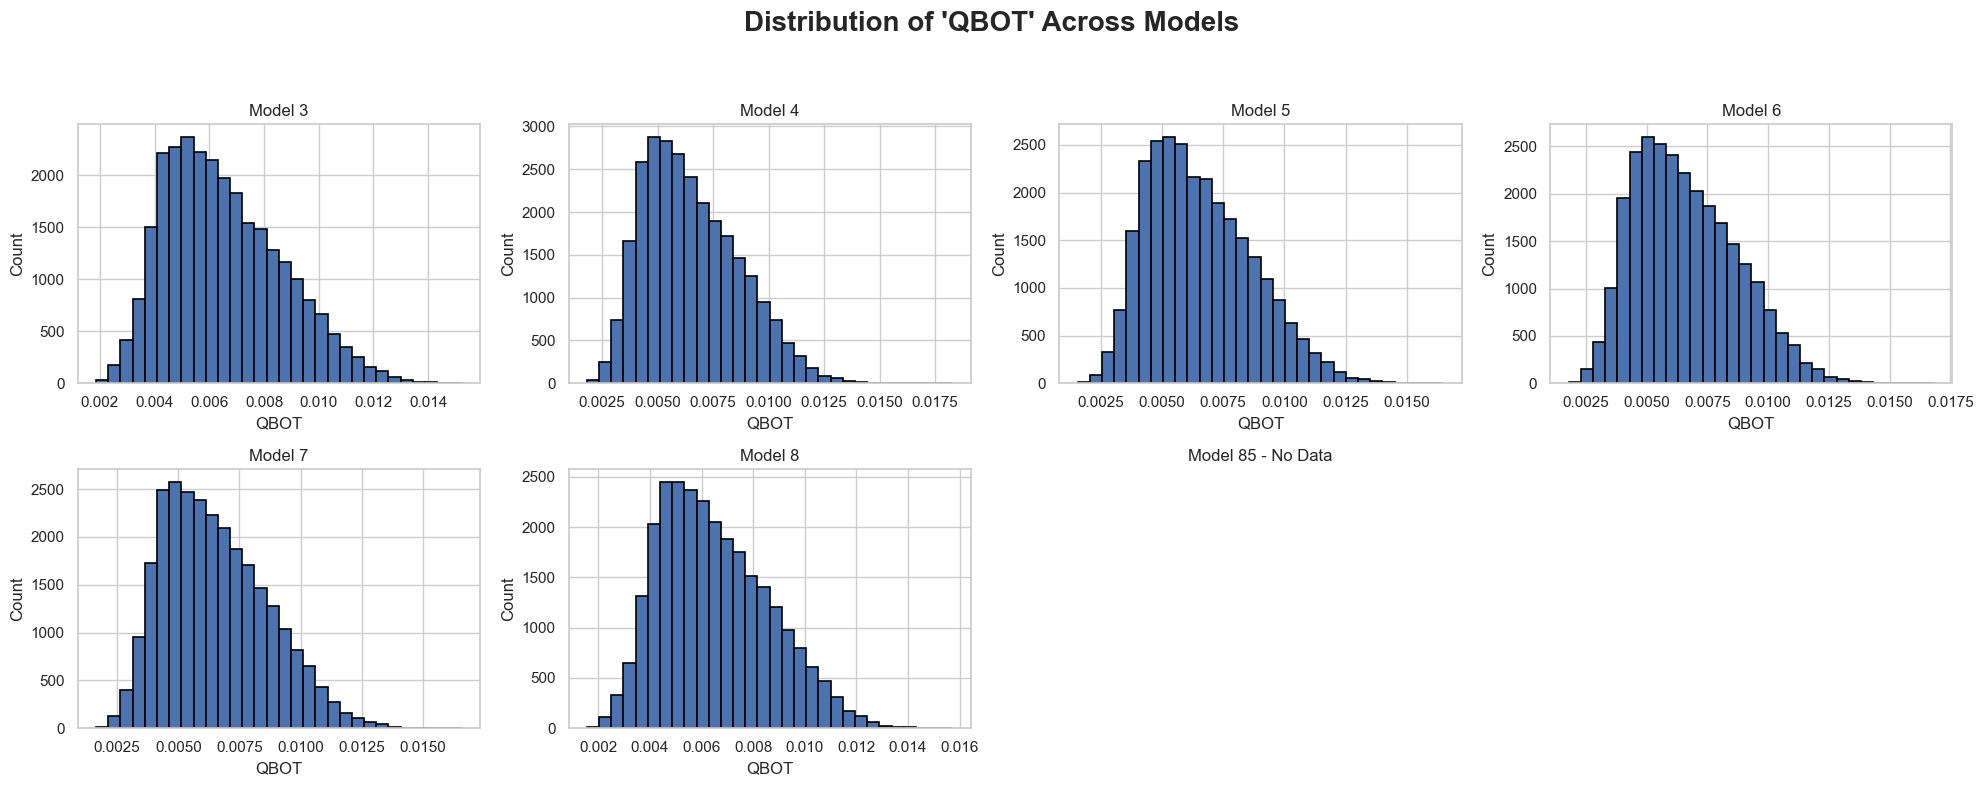

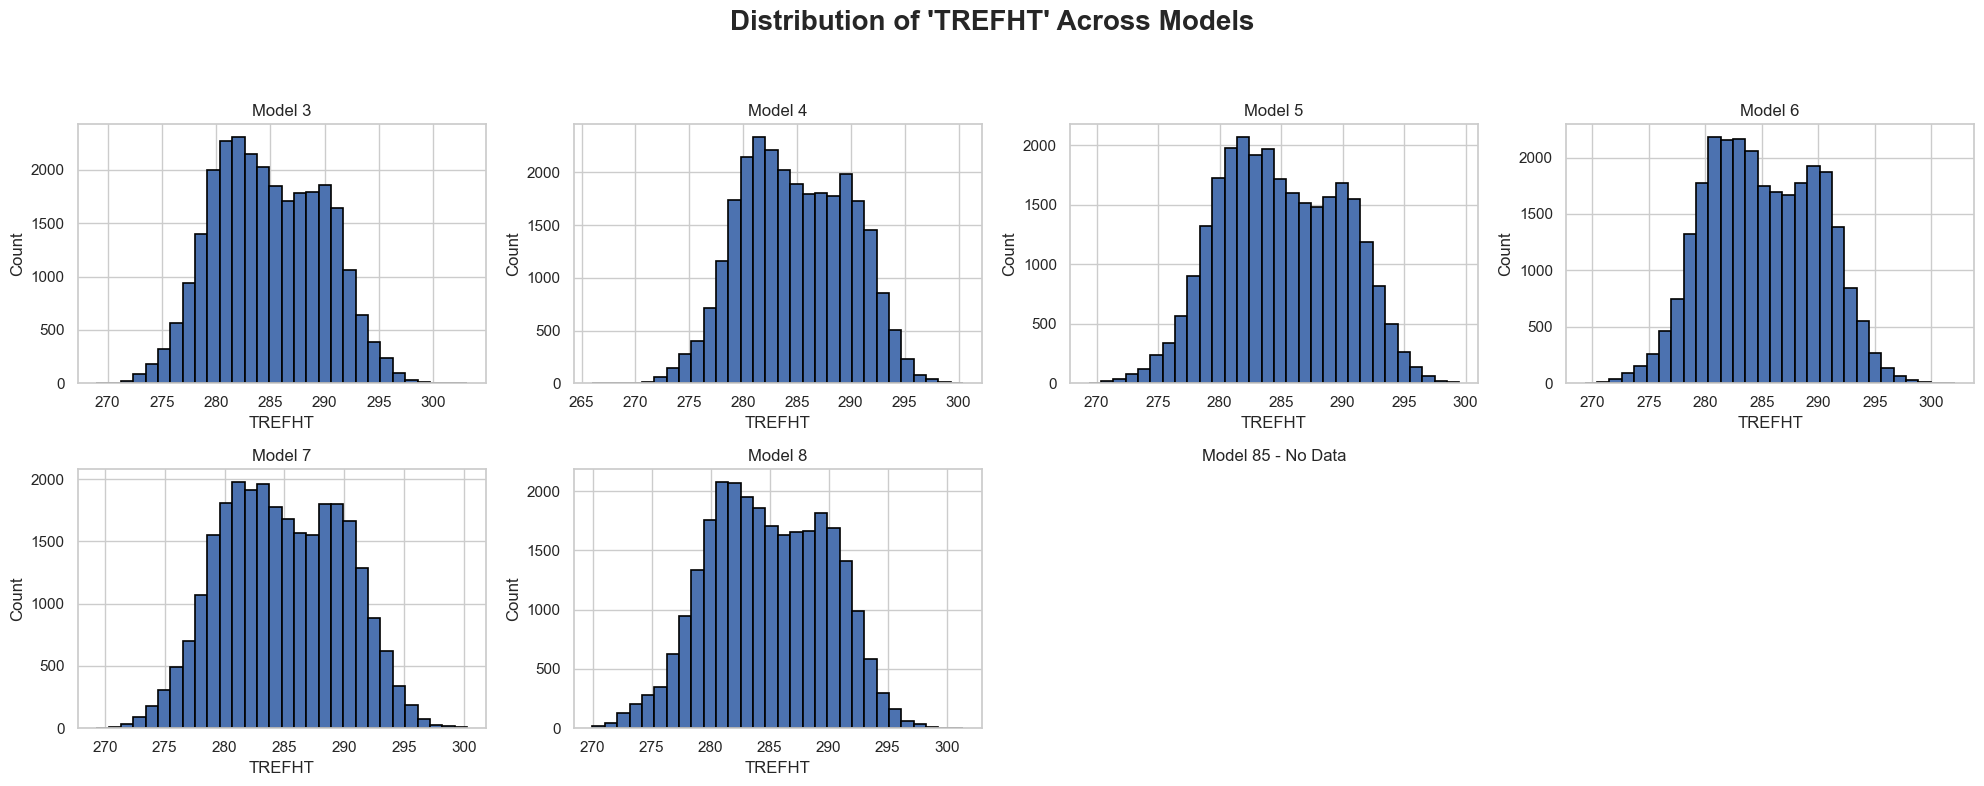

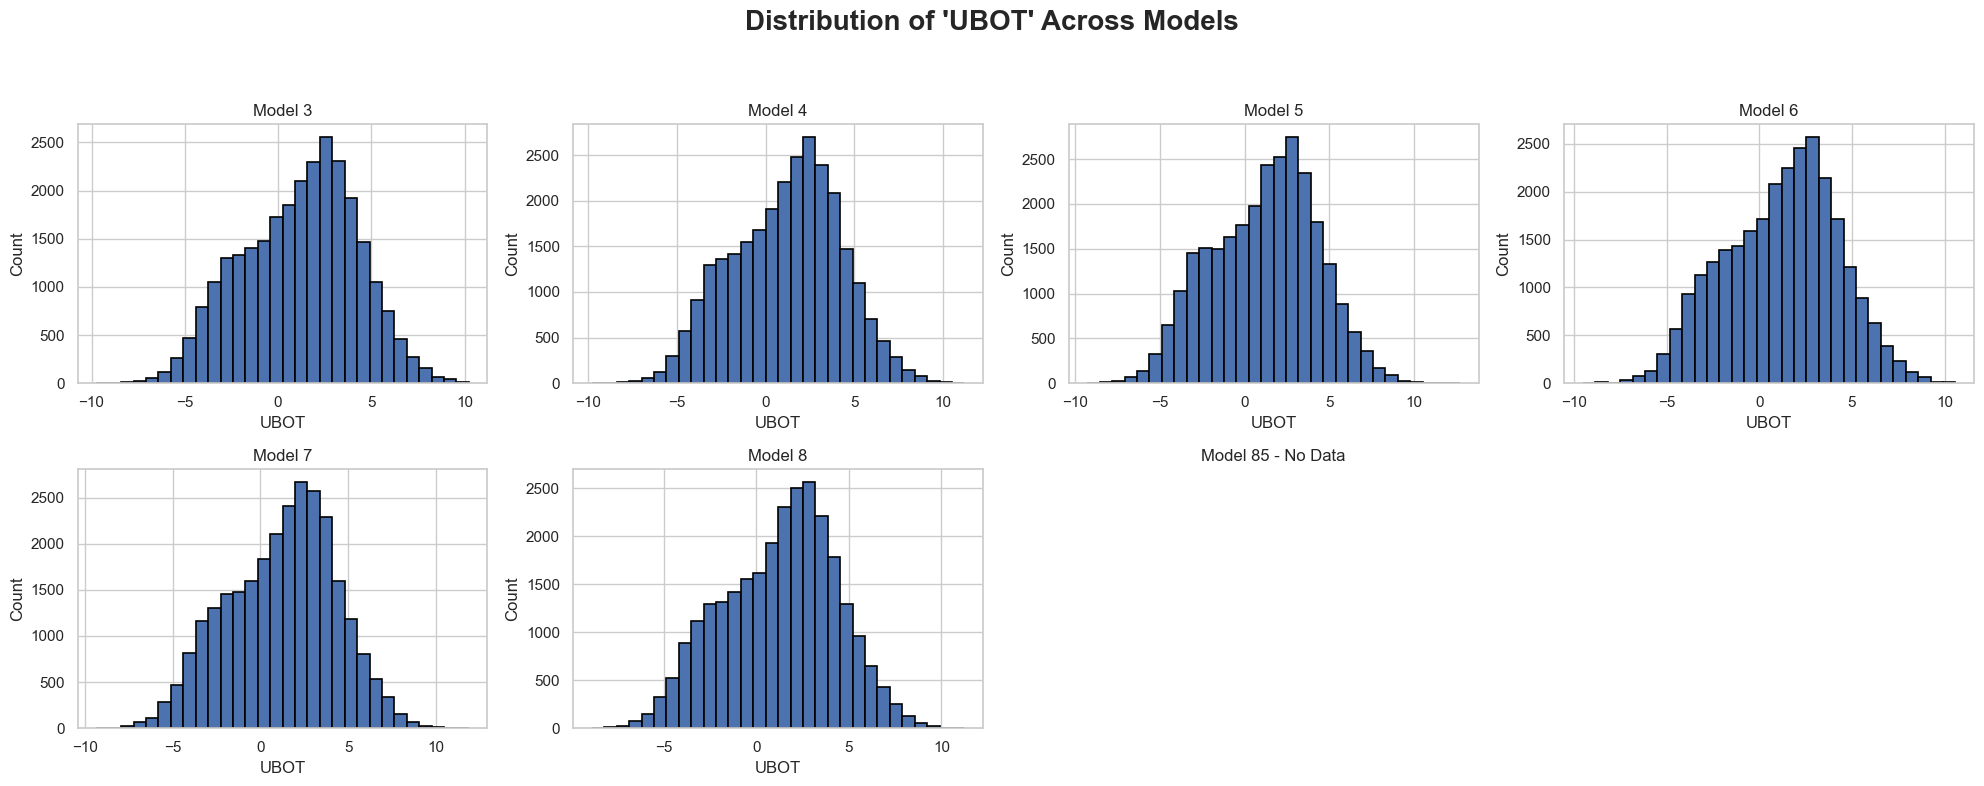

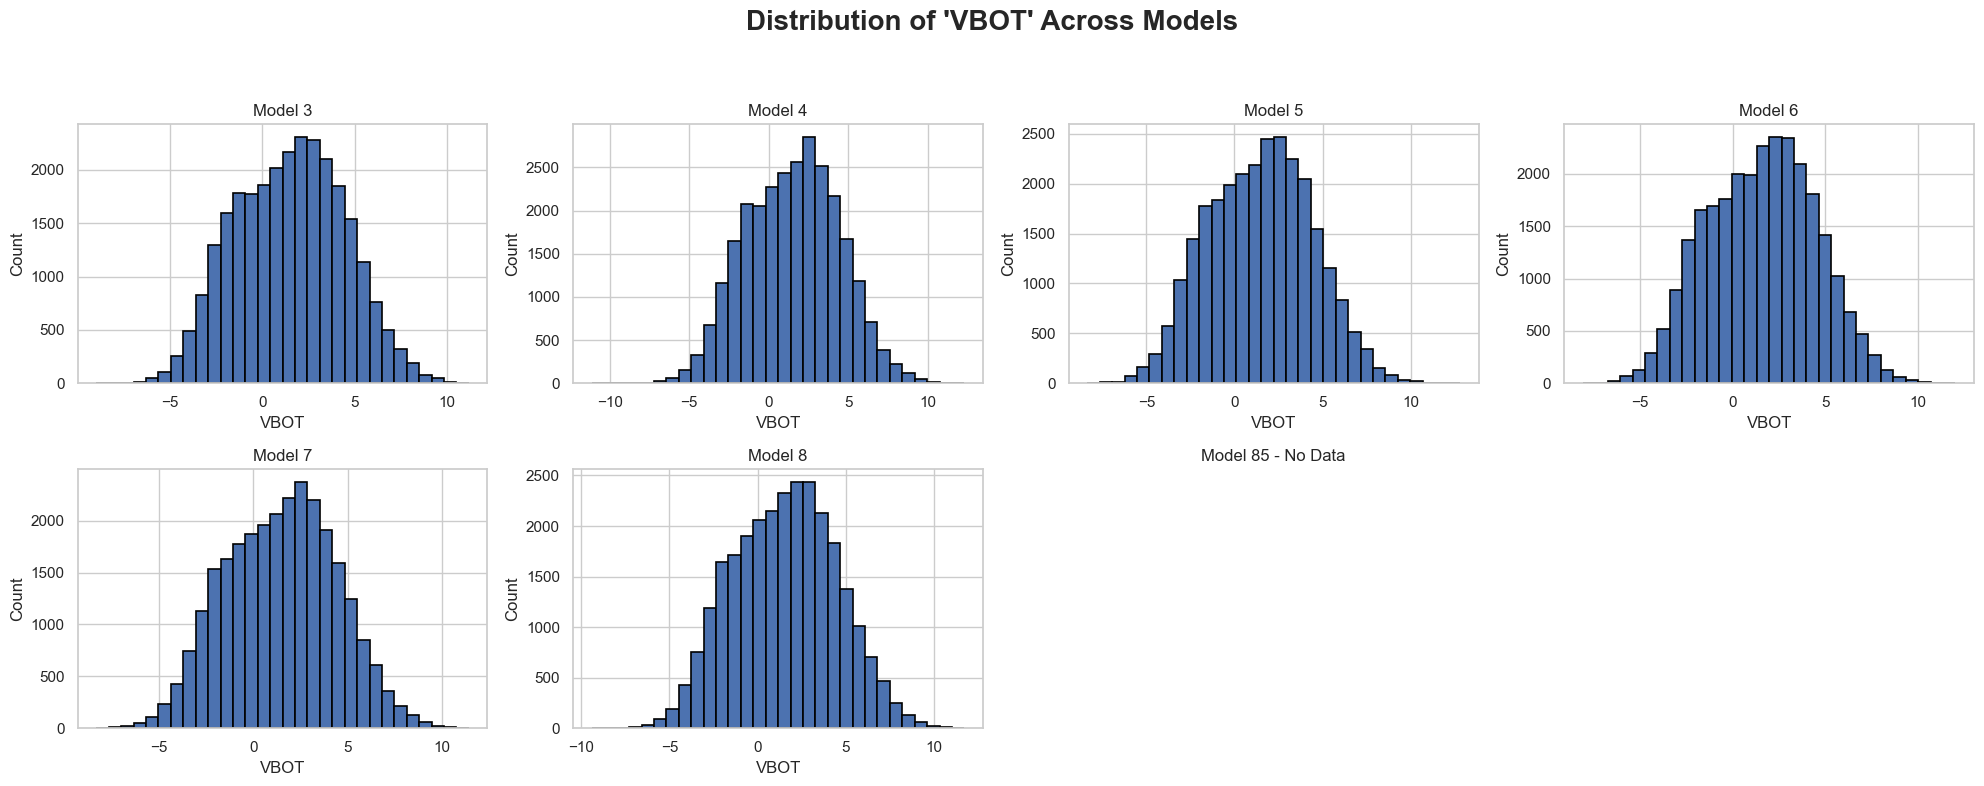

In [ ]:
import matplotlib.pyplot as plt
import math

# Model and Variables
models = [3, 4, 5, 6, 7, 8, 85]
variables = ['TREFMXAV_U', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT', 'TREFHT', 'UBOT', 'VBOT']

for var in variables:
    cols = 4 # Number of columns
    rows = math.ceil(len(models) / cols) # Number of rows

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows)) # Create the subplot figure
    fig.suptitle(f"Distribution of '{var}' Across Models", fontsize=20, fontweight='bold') # Title of the whole figure
    axes = axes.flatten()

    for i, model in enumerate(models):
        data = df[df['model'] == model][var].dropna() # Select the data for the current model and variable and remove null values

        ax = axes[i] # Select the current axis

        if data.empty: # If the data is empty, plot a message and skip
            ax.set_title(f'Model {model} - No Data')
            ax.axis('off')
        else: # Otherwise, plot the histogram
            ax.hist(data, bins=30, edgecolor='black', linewidth=1.2, range=(data.min(), data.max()))
            ax.set_title(f'Model {model}')
            ax.set_xlabel(var)
            ax.set_ylabel('Count')

    # Delete extra subplots
    for ax in axes[len(models):]:
        fig.delaxes(ax)
        
    # Adjust the layout
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

